## CNN for CIFAR-10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


Init Plugin
Init Graph Optimizer
Init Kernel


### 1. Data

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data() # cifar-10 data load

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255 # 데이터가 1~255의 정수로되어있으므로 255로나눠 0~1 사이의 값을 갖도록 만들어 줘야 학습이 가능함. 
X_test /= 255

print('X_train shape:', X_train.shape) # 50000x32x32x3의 4D array로 구성되어있음. 끝의 3은 RGB를 나타냄
print(X_train.shape[0], 'train samples') 
print(X_test.shape[0], 'test samples')

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [4]:
# Y_train, Y_test에 one-hot encoding을 적용함. 총 10개의 클래스가 존재하기 때문에 10개로 적용한 것
Y_train = tf.keras.utils.to_categorical(y_train,10) 
Y_test = tf.keras.utils.to_categorical(y_test,10)



### 2. Model( input_shape=32x32x3, output=10)

In [5]:
batch_size = 256 # 데이터 셋이 크기때문에 batch size도 더 크게해도 됨. 512도 작동하는 것을 확인

# input의 image size는 32x32
pool_size = (2, 2)  # maxpoling layer의 크기
kernel_size = (3, 3)  # Convolution layer의 크기 

In [6]:
epoch = 50 

model = tf.keras.models.Sequential()

#layer 1
model.add(tf.keras.layers.Conv2D(32, kernel_size, padding='same', input_shape=(32,32,3),activation='relu')) # padding은 경계부분을 처리하는 방법. same은 입력, 출력이 같은 사이즈
model.add(tf.keras.layers.BatchNormalization()) # 각 레이어마다 batchnormalization을 진행함. overfitting을 예방하고, weight가 0으로 내려가는것을 막아줌
model.add(tf.keras.layers.Conv2D(32, kernel_size, padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization()) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size)) # Pooling중 Maxpooling을 사용함. 3x3 커널에서 최대값을 꺼내 2x2로 출력하는 과정
model.add(tf.keras.layers.Dropout(0.25)) # Moxpooling과 마찬가지로 dropout을 이용해 매 layer 층마다 overfitting을 조절하였음

#layer 2
model.add(tf.keras.layers.Conv2D(64, kernel_size, padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(64, kernel_size, padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
model.add(tf.keras.layers.Dropout(0.25))

#layer 3
model.add(tf.keras.layers.Conv2D(128, kernel_size, padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Conv2D(128, kernel_size, padding='same',activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.MaxPooling2D(pool_size=pool_size))
model.add(tf.keras.layers.Dropout(0.4)) 

#layer 4
model.add(tf.keras.layers.Flatten()) # 레이어와 maxpooling을 거치면 2차원의 자료로 나오는데, 이를 1차원으로 변경해주는 과정 Flatten
model.add(tf.keras.layers.Dense(256,activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.Dropout(0.5))

#layer 5
model.add(tf.keras.layers.Dense(10,activation='softmax')) # output=10인 multi-classfication과 같은문제이므로 softmax를 활용


model.summary()

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2021-12-21 14:30:42.841358: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-12-21 14:30:42.842591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

### 3. Loss and optimizer(loss=categorical CE, optimizer=Adam)

In [7]:
# 0~9를 분류하는 softmax 문제이기때문에 categorical CE를 lossfunction으로 사용. optimizer은 gradient descent의 한 종류인 Adam을 이용
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])  

### 4. Train (validation=0.2)

In [8]:
history=model.fit(X_train, Y_train, batch_size=batch_size, epochs=epoch, validation_split=0.2)

2021-12-21 14:30:44.553914: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-21 14:30:44.563592: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 1/50


2021-12-21 14:30:45.055829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - ETA: 0s - loss: 1.9034 - accuracy: 0.3883

2021-12-21 14:31:19.668702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


157/157 [==============================] - 37s 194ms/step - loss: 1.9034 - accuracy: 0.3883 - val_loss: 4.0604 - val_accuracy: 0.1005
Epoch 2/50
157/157 [==============================] - 32s 207ms/step - loss: 1.2669 - accuracy: 0.5513 - val_loss: 3.6181 - val_accuracy: 0.1335
Epoch 3/50
157/157 [==============================] - 31s 197ms/step - loss: 1.0445 - accuracy: 0.6278 - val_loss: 1.9115 - val_accuracy: 0.3776
Epoch 4/50
157/157 [==============================] - 33s 208ms/step - loss: 0.9161 - accuracy: 0.6745 - val_loss: 1.0743 - val_accuracy: 0.6193
Epoch 5/50
157/157 [==============================] - 33s 209ms/step - loss: 0.8298 - accuracy: 0.7070 - val_loss: 0.8598 - val_accuracy: 0.6952
Epoch 6/50
157/157 [==============================] - 33s 211ms/step - loss: 0.7650 - accuracy: 0.7306 - val_loss: 0.6927 - val_accuracy: 0.7551
Epoch 7/50
157/157 [==============================] - 33s 209ms/step - loss: 0.7139 - accuracy: 0.7471 - val_loss: 0.7219 - val_accuracy: 0.7

### 5. Test

In [9]:
predict = model.evaluate(X_test, Y_test) # test를 하는 함수 = evaluate

print('Test loss:', predict[0]) # evaluate를 통해 index 0앤 loss, 1엔 accuracy가 들어가있음 이를 출력
print('Test accuracy:', predict[1])

313/313 [==============================] - 4s 11ms/step - loss: 0.5686 - accuracy: 0.8504
Test loss: 0.5685979127883911
Test accuracy: 0.8504000306129456


### 6. Result

In [10]:
## history 함수에 정확도, loss가 모두 저장되어있음. 이를 꺼내옴
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

### 6-1. loss plot

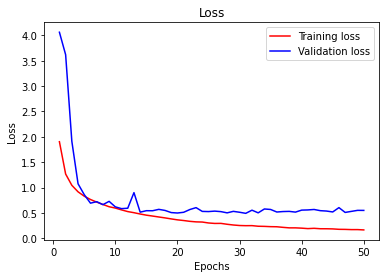

In [11]:
epochs = range(1,len(acc)+1)

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

### 6-2. Acc plot

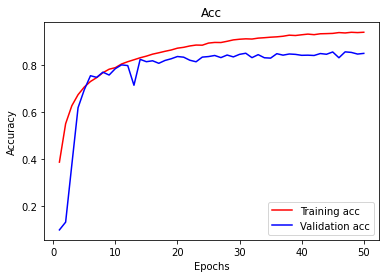

In [12]:
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

### 7. Report

 기본적으로 데이터 전처리 과정으로 X_train, X_test는 RGB값으로, 0~255의 정수를 가지는 데이터를 가지고 있음을 안다. 이를 활용하기 위하여 0~1사이의 값으로 변환을 하기 위해 255로 나눠주었고, class가 0~9에 해당하는 정수 값이므로 Y_train, y_test 데이터에 one-hot encoding을 적용함으로써 각 class(airplane,automobile 등)에 해당하는 index에 1이 출력되도록 만들어주었다.  

 모델에선 처음에 input_shape=32x32x3이다. 32x32 사이즈의 image를 rgb로 총 3개의 채널이 존재한다. 기존의 모델을 구현하였을 때 Conv2D layer 1층에 maxpooling 1층씩 해서 모델을 구현하였더니 성능이 약 70%정도에서 더이상 정확도가 오르지 않았을 뿐더러 overfitting이 강하게 일어나 epoch를 매우 낮게(최대 15) 로 진행하여야만 했다. 하지만, Conv2D 층 2 개를 이용하여 하나로 묶는 형태로 dropout의 도입과 각 Conv2D 레이어마다 batchnormalizattion을 집어넣어 overfitting 문제를 잡으면서 더 큰 epoch를 이용 할 수 있게 만들었다. epoch를 더이상 늘려도 val loss와 accuracy가 거이 일정한 수준으로 보이는 것으로 보아 50 이상은 진행하지 않아도 된다고 판단하였다. dropout의 크기도 중요하였는데, 모두를 0.2를 시작으로, 조금씩 늘려가며 잘 나오는 구간을 찾아보니 마지막은 크게 0.5를주고, 처음은 적게주다가 늘려주는 방식이 이 모델을 구현하는데에 있어선 좋은방법 이었다. 그리고, Maxpooling과 Batchnormalization, Dropout의 순서가 이 모델에선 굉장히 중요하였다.  Conv2D 레이어, activation 레이어, maxpooling 레이어, Batchnormalization(BN), Dropout 총 다섯개의 레이어의 순서를 달리하면 또 모델의 정확도가 조금씩 변화하였기 때문이다. activation 레이어는 Conv2D에서 분리도 가능한데, BN 후에 activation을 동작하면 더 좋은 효과를 보여주긴 하였지만, 속도도 느려지고 미미한 차이라 Conv2D 레이어에 붙인 형태로 동작시켰고, Conv2D-activation-BN-Conv2D-activation-BN-Maxpooling-dropout 의 구성으로 진행하다가 #layer 4에서 모델을 Flatten 하여 1차원으로 변경하여 준 후, 마지막에 softmax로 총 10개의 output으로 분류하였다. 

 이 문제는 0~9의 총 10개의 output을 분류하는 softmax를 활용한 문제이기 때문에 loss function은 categorical_crossentropy를 이용하였고, optimizer은 gradient descent방법중 하나인 Adam을 이용하였다. default값의 learning_rate로 사용한 Adam, SGD중엔 Adam이 더 정확도가 높았기 때문에 이를 이용하였다. learning_rate를 변화시켜가며 모델을 개선시키기엔 학습 속도가 매우 느렸기 때문에 전부 다 해보진 못했지만, 미미한 차이가 있을 것이라고 예상된다.

 트레인은 총 256의 batch size로 50번의 epoch, 그리고 20%의 데이터를 validation 데이터로 활용하여 진행하였다. validation loss 데이터로 overfitting을 예측 할 수 있고, validation accuracy로 test의 정확도를 예측해볼 수 있다. 여기서 batch size는 더 키워서 진행하여도 된다. 512로 진행하여도 잘 나오는 것을 확인하였다. 하지만, epoch는 더이상 늘려도 학습이 더이상 진행되진 않았다. validation loss가 감소하지도 않고, validation acc가 증가하지도 않고 거이 일정하였기 때문에 더 늘리지 않고 50번만 진행하였다.

 테스트는 총 tensorflow에 내장된 evaluate 함수를 통해 X_test, Y_test를 이용하여 loss와 accuracy를 출력하였고, 약 85.0%의 정확도를 보였다.

 결과 그래프를 통해 validation 데이터와 train 데이터를 epoch에 대해서 loss와 accuracy를 볼 수 있다. loss는 validation loss가 최대한 떨어지는 구간까지 진행하였고, loss가 위로 증가하진 않아 overfitting이 일어나진 않았다고 볼 수 있으며, accuracy를 보았을 때도 validation loss가 약 84~86% 구간에서 유지되는 것을 알 수 있었다.

이를 정리하면, mnist, fashion-mnist와는 다르게 CNN을 활용한 복잡한 분류 문제에선 모델을 어떻게 구성하느냐에 따라 정확도가 천차만별 임을 알 수 있었다. 따라서 더 좋은 정확도를 얻기 위해선 모델을 어떻게 구성해야 할 지, Pooling, BN, activation, dropout등과 Conv2D에서의 padding값 들을 최대한 활용하여 최적의 모델을 구현하기 위해 노력해야하고, 다른 사람의 코드를 활용 하는 것도 매우 중요하지만, 어떤 방식으로 구현되는지 순서와 의미들, 즉 이론을 알고있어야 더 좋고 나은 모델을 구현할 수 있다는 점을 알 수 있었다.